# Analyzing the Impact of clock-rate drifts at sender/receiver stations on data packet lengths
## Name: Gaurav Kuwar
### Intro

Analyzing the Impact of clock-rate drifts at sender/receiver stations on data packet lengths. Devised an efficient algorithm to compute an optimal maximum packet size (Rm) given the parameters reference clock rate, clock drift rate, and signal sample threshold. Plotted in three graphs is the effect on the maximum packet size by changing each of the different parameters.

### Libraries Imported

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Functions for getting Max Packet Size (Rm)

In [79]:
def formula(Rm, C, cdr, sst):
    return ((Rm / (C - (cdr * (Rm / (2 * C))))) - (Rm / C)) <= ((1 - sst) / C)

The function `formula` defines the condition which is True if the reciever has enough signal energy to reconstruct the the bit for the given parameters.

The variable names for the parameters for the entire report are:

- `Rm` = maximum packet size in bits
- `C` = Reference clock-rate in bits/sec
- `cdr` = clock-drift rate in bits/sec^2
- `sst` = signal sample threshold


In [80]:
def getRm(C, cdr, sst):
    """
    Time Complexity: O(log(n)) where n is the ((2 * C * C) / cdr) - 1, upper bound for Rm
    Used binary search to get Rm which satisfies the condition that the formula is True for Rm
    but False for Rm+1
    """
    l, r = 0, ((2 * C * C) / cdr) - 1
    
    while l <= r:
        m = (l + r) // 2
        formula_m = formula(m, C, cdr, sst)
        formula_m1 = formula(m+1, C, cdr, sst)
        
        if formula_m and not formula_m1:
            return int(m)
        elif not formula_m:
            r = m - 1
        else:
            l = m + 1

I was able to figure out the upper bound for Rm, and we know that the lower bound is 0. By experimenting with the numbers I was able to figure out when Rm becomes a certain value it results in a negative left hand side in the formula or 0. This was because `(C - (cdr * (Rm / (2 * C))))` in the formula becomes <=0 for some value of Rm, which is the upper bound for Rm, since the right hand side (rhs) of the formula should be always 0 <= rhs <= 1. We can solve for `(C - (cdr * (Rm / (2 * C)))) = 0` to get the upper bound for Rm, and subtract by 1 to make sure that value of Rm is not included. We can then use binary search to very fast calculate Rm, by finding the Rm for which the formula results True, but also results False for Rm+1.

### Default Parameters

When plotting for each parameter we keep the other parameters these same default values.

In [81]:
C = 1e6 # 1 mpbs
cdr = 200e-6 # bits/sec^2
sst = 0.4 

### Plot Signal Sample Threshold Vs Max Packet Size

In [124]:
def plotSst(lower=0, upper=1, interval=0.1):
    x, y = 'signal sample threshold', 'max packet size'
    data = [] # Of type: [signal sample threshold, max packet size (Rm)]    
    for sst in np.arange(lower, upper+interval, interval):
        data.append([sst, getRm(C, cdr, sst)])
        
    # Create the pandas DataFrame (for readable table)
    df = pd.DataFrame(data, columns=[x, y])
    df.plot.scatter(x=x, y=y)
    
    title = x+" vs "+y
    plt.title(title)
    plt.savefig(title.replace(" ", "_") + ".png")
    fig = plt.gcf()
    fig.set_size_inches(15, 10, forward=True)

    plt.show()
    return df

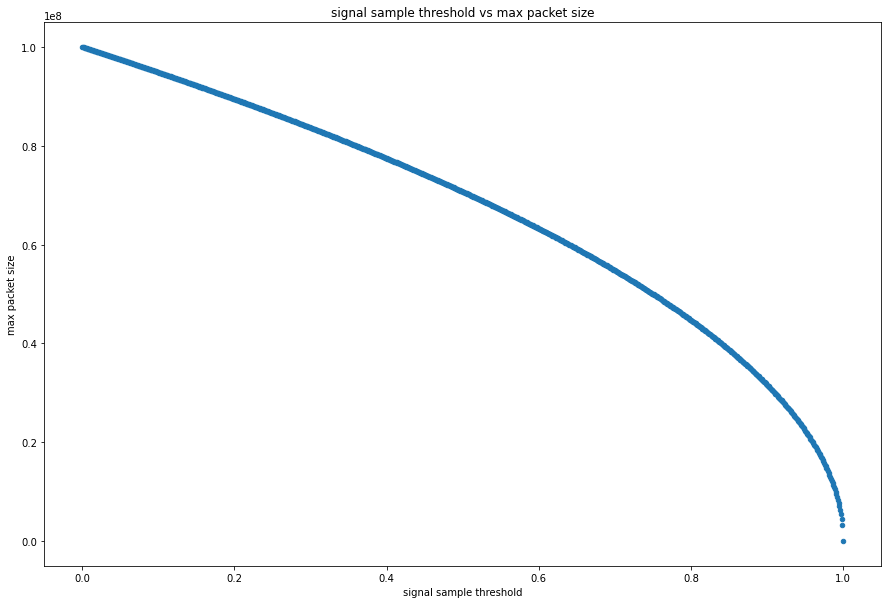

,signal sample threshold,max packet size
0,0.000,99999999
1,0.001,99949986
2,0.002,99899949
3,0.003,99849886
4,0.004,99799798
...,...,...
996,0.996,6324555
997,0.997,5477225
998,0.998,4472135
999,0.999,3162277


In [125]:
plotSst(interval=0.001)

#### Explaination:

We plot the scatter graph to see the effect of changing signal sample threshold on Rm. We select all values from the range 0 to 1, with an interval of 0.001 for more data points. From the pattern of the graph we can conclude that it is logarithmic graph, and the as the signal sample threshold increases the max packet size decreases first slowly, and later on much more exponentially.

### Plot Reference Clock-rate Vs Max Packet Size

In [131]:
def plotC(lower=1, upper=1000, interval=1):
    x, y = 'reference clock-rate', 'max packet size'
    data = [] # Of type: [reference clock-rate, max packet size (Rm)]    
    for C in np.arange(lower, upper+interval, interval):
        data.append([C, getRm(C, cdr, sst)])
        
    # Create the pandas DataFrame (for readable table)
    df = pd.DataFrame(data, columns=[x, y])
    df.plot.scatter(x=x, y=y)
    
    title = x+" vs "+y
    plt.title(title)
    plt.savefig(title.replace(" ", "_") + ".png")
    fig = plt.gcf()
    fig.set_size_inches(15, 10, forward=True)

    plt.show()
    return df

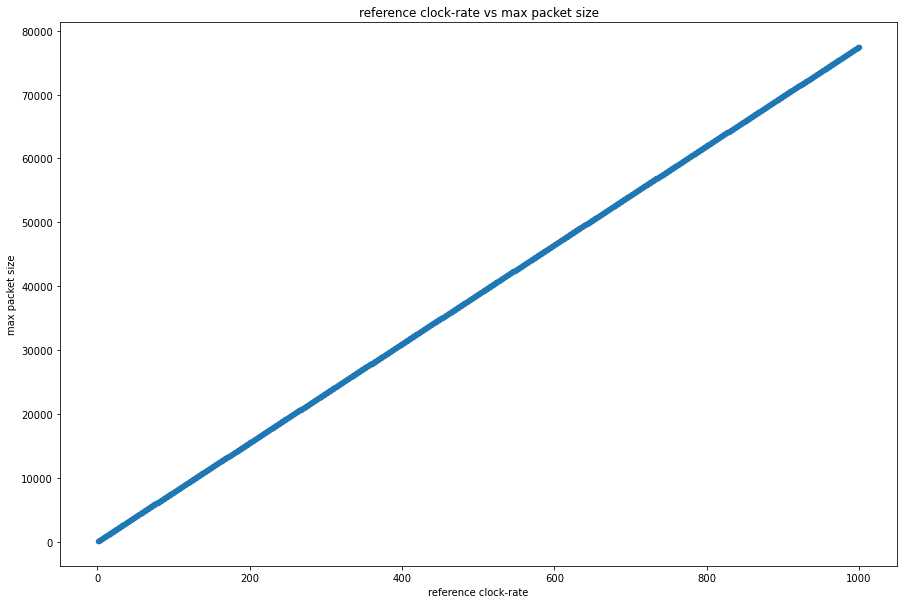

,reference clock-rate,max packet size
0,1,77
1,2,154
2,3,232
3,4,309
4,5,386
...,...,...
995,996,77149
996,997,77226
997,998,77304
998,999,77381


In [132]:
plotC()

#### Explaination:

We plot a scatter graph from intervals 1 to 1000, with an interval of 1.

We can see that the graph is linear, meaning that the reference clock-rate is directly proportional to the max packet size. This makes sense conceptually because as the more clock-rate means more bits can be transfered per second, hence why the packet size also increases.

### Plot Reference Clock-drift rate Vs Max Packet Size

In [126]:
def plotCdr(lower=0.000001, upper=0.0004, interval=0.000001):
    x, y = 'clock-drift rate', 'max packet size'
    data = [] # Of type: [clock-drift rate, max packet size (Rm)]    
    for cdr in np.arange(lower, upper+interval, interval):
        data.append([cdr, getRm(C, cdr, sst)])
        
    # Create the pandas DataFrame (for readable table)
    df = pd.DataFrame(data, columns=[x, y])
    df.plot.scatter(x=x, y=y)
    
    title = x+" vs "+y
    plt.title(title)
    plt.savefig(title.replace(" ", "_") + ".png")
    fig = plt.gcf()
    fig.set_size_inches(15, 10, forward=True)
    
    plt.show()
    return df

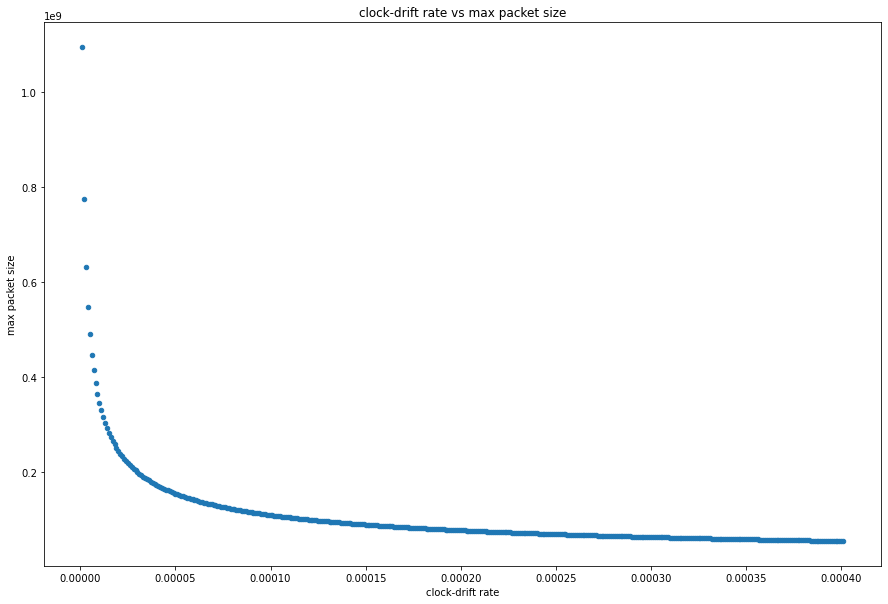

,clock-drift rate,max packet size
0,0.000001,1095445036
1,0.000002,774596643
2,0.000003,632455516
3,0.000004,547722559
4,0.000005,489897947
...,...,...
396,0.000397,54978814
397,0.000398,54909702
398,0.000399,54840849
399,0.000400,54772255


In [127]:
plotCdr()

#### Explaination

We plot a scatter graph and use a lower bound of 0.000001 same as the interval to avoid starting at 0 (since it would cause division by 0), and an upper bound of 0.0004 with an interval of 000001.

Here, we see that as the clock drift rate increases the max packet size decreases exponentially. This makes sense conceptually because if the clock is drifting more rapidly, we would reach our signal sampling threshold faster, and our max packet size would be much less.